In [3]:
from pyrpiqa import RPIQA

In [2]:
rpiqa = RPIQA("RP-f09013.local", 1, verbose=True)

Transfering files...
Transferred acquire.c
Transferred configure.c
Transferred Makefile
Installing gcc and make
Output:
OK: 131 MiB in 121 packages

Compiling executables... Following is the output of the 'make all' command
Error(s):
acquire.c: In function 'main':

acquire.c:96:24: warning: passing argument 2 of 'memcpy' discards 'volatile' qualifier from pointer target type [-Wdiscarded-qualifiers]

   96 |         memcpy(buffer, fifo, 16384);

      |                        ^~~~

In file included from acquire.c:6:

/usr/include/string.h:27:33: note: expected 'const void * restrict' but argument is of type 'volatile uint64_t *' {aka 'volatile long long unsigned int *'}

   27 | void *memcpy (void *__restrict, const void *__restrict, size_t);

      |                                 ^

Output:
gcc -O3 -march=armv7-a -mtune=cortex-a9 -mfpu=neon -mfloat-abi=hard -o acquire acquire.c -lm

gcc -O3 -march=armv7-a -mtune=cortex-a9 -mfpu=neon -mfloat-abi=hard -o configure configure.c -lm



PermissionError: [Errno 13] Permission denied: '.'

Socket exception: An existing connection was forcibly closed by the remote host (10054)


To test, a sinusoidal signal of frequency of 1 MHz is fed to input 1 of the Red Pitaya.

In [9]:
rpiqa.set_modulation_frequency(1.001e6) # Set the demodulation frequency 1kHz away from the signal
rpiqa.set_sample_rate(rpiqa.SAMPLE_RATE_100KSPS) # Set the sample rate to 100kHz
t, I, Q = rpiqa.acquire(2.5) # Acquire 2.5 seconds of data

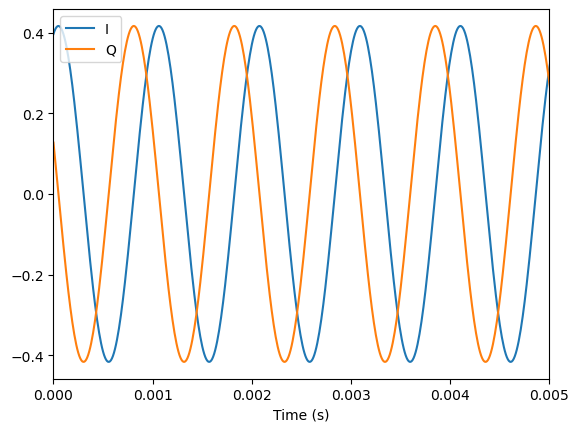

Text(0, 0.5, 'PSD')

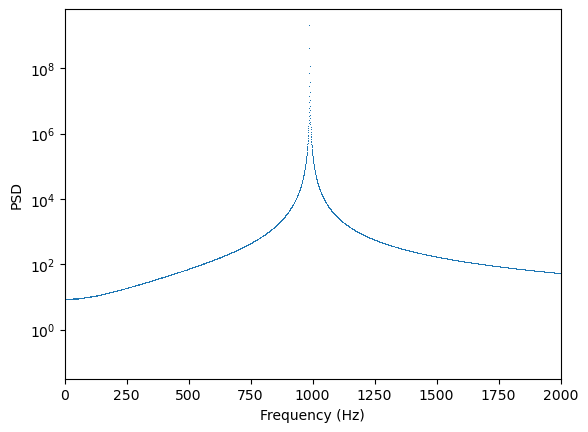

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(t, I, label="I")
plt.plot(t, Q, label="Q")
plt.xlim(0, 5/0.001e6)
plt.xlabel("Time (s)")
plt.legend()
plt.show()

PSD = np.abs(np.fft.rfft(I))**2
freqs = np.fft.rfftfreq(t.shape[0], t[1]-t[0])
plt.plot(freqs, PSD, ",")
plt.xlim(0, 2e3)
plt.yscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")

In [12]:
rpiqa.close()